<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W1122 15:53:07.761428 139976416961344 module_wrapper.py:139] From /tmp/ipykernel_1914982/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W1122 15:53:07.763066 139976416961344 module_wrapper.py:139] From /tmp/ipykernel_1914982/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
data_path = "/home/ajita/Documents/data_integration/Pan/Pancreas.h5ad"
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_atlas_public.h5ad"
data_path = "/home/ajita/Documents/data_integration/Lung/Lung_NA_0.1.h5ad" #0.2.

In [9]:
name = "Lung"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                } 

W1122 15:53:08.421137 139976416961344 module_wrapper.py:139] From /tmp/ipykernel_1914982/4235477150.py:11: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1122 15:53:08.422749 139976416961344 module_wrapper.py:139] From /tmp/ipykernel_1914982/4235477150.py:16: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2022-11-22 15:53:08.424333: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-22 15:53:08.454628: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2022-11-22 15:53:08.463562: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e6391ed500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-22 15:53:08.463591: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-

came in load_gene
updated hvg


W1122 15:53:22.259205 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 15:53:22.267679 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:316: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1122 15:53:22.268752 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new_semi.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1122 15:53:22.269584 139976416961344 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.c

here [16 16 16 ... 10 10 10]
Shape self.data_train: (32472, 2000)
Shape self.data_test: (32472, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2016), dtype=float32)


W1122 15:53:22.502405 139976416961344 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:345: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1122 15:53:22.605744 139976416961344 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:44: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1122 15:53:22.607393 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:657: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



decoder input shape  Tensor("concat_2:0", shape=(?, 26), dtype=float32)


W1122 15:53:22.979844 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new_semi.py:41: The name tf.log is deprecated. Please use tf.math.log instead.

W1122 15:53:22.988446 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new_semi.py:41: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.

W1122 15:53:23.028016 139976416961344 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:152: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W1122 15:53:23.080018 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integ

inferred check Tensor("Max:0", shape=(), dtype=float32)
entering in for loop 1   512  -- > 256
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)


W1122 15:53:23.116199 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:192: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1122 15:53:23.144621 139976416961344 deprecation.py:323] From /home/ajita/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Cluster DRA on DataSet /home/ajita/Documents/data_integration/Lung/Lung_NA_0.1.h5ad ... 


W1122 15:53:24.781605 139976416961344 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:208: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 534.6891, d_loss: -0.0025 , db_loss: 2.2895
Epoch : [1] ,  a_loss = 327.1492, d_loss: -0.0040 , db_loss: 1.2501
Epoch : [2] ,  a_loss = 288.5316, d_loss: -0.0514 , db_loss: 1.2710
Epoch : [3] ,  a_loss = 506.8737, d_loss: -0.0120 , db_loss: 3.0354
Epoch : [4] ,  a_loss = 403.1261, d_loss: -0.0295 , db_loss: 1.5747
Epoch : [5] ,  a_loss = 455.2266, d_loss: -0.0069 , db_loss: 2.0129
Epoch : [6] ,  a_loss = 455.7064, d_loss: -0.0126 , db_loss: 1.7936
Epoch : [7] ,  a_loss = 272.1482, d_loss: -0.0483 , db_loss: 0.1679
Epoch : [8] ,  a_loss = 435.1265, d_loss: -0.0061 , db_loss: 1.6626
Epoch : [9] ,  a_loss = 428.2189, d_loss: -0.0067 , db_loss: 1.1537
Epoch : [10] ,  a_loss = 485.1382, d_loss: -0.0029 , db_loss: 2.1641
Epoch : [11] ,  a_loss = 405.4393, d_loss: -0.0047 , db_loss: 2.0090
Epoch : [12] ,  a_loss = 226.0274, d_loss: -0.0753 , db_loss: 1.6511
Epoch : [13] ,  a_loss = 378.7181, d_loss: 0.1961 , db_loss: 1.6068
Epoch : [14] ,  a_loss = 454.2067, d_loss: -0

Epoch : [119] ,  a_loss = 233.0636, d_loss: -0.0431 , db_loss: 1.6634
Epoch : [120] ,  a_loss = 177.5643, d_loss: -0.0406 , db_loss: 1.8983
Epoch : [121] ,  a_loss = 360.2863, d_loss: -0.0109 , db_loss: 1.7835
Epoch : [122] ,  a_loss = 420.9602, d_loss: -0.0430 , db_loss: 0.2081
Epoch : [123] ,  a_loss = 381.7078, d_loss: -0.0020 , db_loss: 1.4644
Epoch : [124] ,  a_loss = 223.0889, d_loss: -0.0072 , db_loss: 1.9516
Epoch : [125] ,  a_loss = 365.3815, d_loss: -0.0105 , db_loss: 1.3828
Epoch : [126] ,  a_loss = 409.2707, d_loss: -0.2465 , db_loss: 0.9358
Epoch : [127] ,  a_loss = 352.2387, d_loss: -0.3186 , db_loss: 1.8718
Epoch : [128] ,  a_loss = 319.8777, d_loss: -0.3166 , db_loss: 1.3923
Epoch : [129] ,  a_loss = 191.2446, d_loss: -0.4508 , db_loss: 1.5044
Epoch : [130] ,  a_loss = 375.5504, d_loss: -0.4668 , db_loss: 1.9546
Epoch : [131] ,  a_loss = 331.5014, d_loss: -0.5247 , db_loss: 1.5171
Epoch : [132] ,  a_loss = 308.5811, d_loss: -0.4059 , db_loss: 1.8158
Epoch : [133] ,  a_l

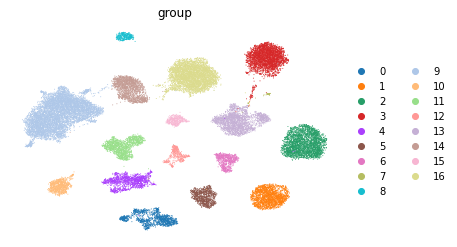

None


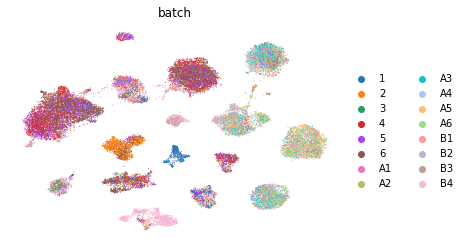

None
Computing NMI ...
Done !
NMI = 0.9339879023345713
Epoch : [201] ,  a_loss = 384.7588, d_loss: -0.6570 , db_loss: 1.8085
Epoch : [202] ,  a_loss = 347.6824, d_loss: -0.6785 , db_loss: 1.7558
Epoch : [203] ,  a_loss = 383.0485, d_loss: -0.5952 , db_loss: 1.8986
Epoch : [204] ,  a_loss = 359.2342, d_loss: -0.6818 , db_loss: 2.1097
Epoch : [205] ,  a_loss = 272.7877, d_loss: -0.4193 , db_loss: 0.2413
Epoch : [206] ,  a_loss = 265.8238, d_loss: -0.5338 , db_loss: 0.3351
Epoch : [207] ,  a_loss = 226.2572, d_loss: -0.5241 , db_loss: 1.9144
Epoch : [208] ,  a_loss = 343.4048, d_loss: -0.5807 , db_loss: 1.8797
Epoch : [209] ,  a_loss = 410.0231, d_loss: -0.6435 , db_loss: 1.2686
Epoch : [210] ,  a_loss = 176.1655, d_loss: -0.5891 , db_loss: 1.6762
Epoch : [211] ,  a_loss = 389.0061, d_loss: -0.4297 , db_loss: 1.2703
Epoch : [212] ,  a_loss = 381.1642, d_loss: -0.6042 , db_loss: 2.3044
Epoch : [213] ,  a_loss = 397.4117, d_loss: -0.3205 , db_loss: 1.3911
Epoch : [214] ,  a_loss = 333.2564,

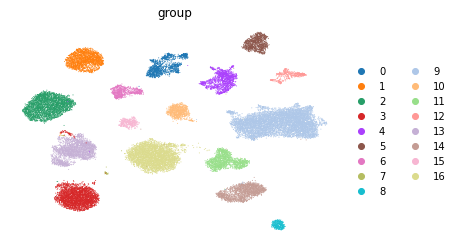

None


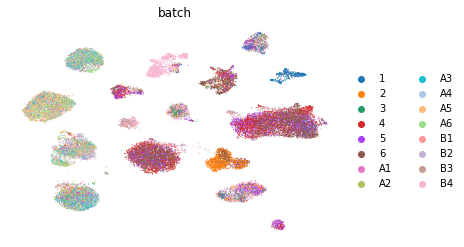

None
Computing NMI ...
Done !
NMI = 0.9331156562742076
Epoch : [251] ,  a_loss = 320.9270, d_loss: -0.5176 , db_loss: 1.0450
Epoch : [252] ,  a_loss = 358.6682, d_loss: -0.6319 , db_loss: 2.6684
Epoch : [253] ,  a_loss = 156.9851, d_loss: -0.6035 , db_loss: 0.8172
Epoch : [254] ,  a_loss = 382.2227, d_loss: -0.5357 , db_loss: 1.9090
Epoch : [255] ,  a_loss = 334.4839, d_loss: -0.6080 , db_loss: 2.3557
Epoch : [256] ,  a_loss = 366.9794, d_loss: -0.7245 , db_loss: 3.4175
Epoch : [257] ,  a_loss = 249.9976, d_loss: -0.6867 , db_loss: 1.6943
Epoch : [258] ,  a_loss = 385.3733, d_loss: -0.5807 , db_loss: 1.4774
Epoch : [259] ,  a_loss = 420.7190, d_loss: -0.7140 , db_loss: 1.5887
Epoch : [260] ,  a_loss = 404.4947, d_loss: -0.5528 , db_loss: 1.6601
Epoch : [261] ,  a_loss = 227.2338, d_loss: -0.3945 , db_loss: 1.1776
Epoch : [262] ,  a_loss = 420.0883, d_loss: -0.6311 , db_loss: 1.1886
Epoch : [263] ,  a_loss = 415.1314, d_loss: -0.6602 , db_loss: 0.6933
Epoch : [264] ,  a_loss = 405.3893,

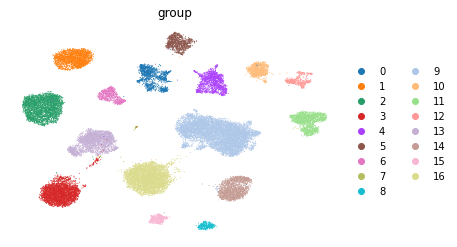

None


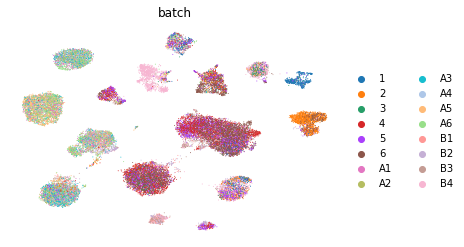

None
Computing NMI ...
Done !
NMI = 0.9216925123805328


'\nwith tf.Session(config = run_config) as sess:\n\n    dreamer = model.scDREAMER(\n        sess,\n        epoch = 300,\n        dataset_name = data_path,\n        batch = batch_key_dic[name],\n        cell_type = cell_type_key_dic[name],\n        name = name\n        )\n\n    dreamer.train_cluster()\n    \n    print("scDREAMER annotations training:")\n    dreamer1 = model1.scDREAMER1(\n        sess,\n        epoch = 50,\n        dataset_name = data_path,\n        batch = batch_key_dic[name],\n        cell_type = cell_type_key_dic[name],\n        name = name\n    )\n\n    dreamer1.train_cluster()\n    \n'

In [10]:
import model # working smooth - need to check if it is the raw version..???
#import model_wo_Dis as model# without Discriminator : working fine
#import model_wo_BC as model # without Batch Classiifer: working fine
#import model_ED as model # working properly with utils_new

#import model_scanvi_split_training as model1 # new model scDREAMER++ with utils
# import model_scanvi as model # scanvi setting

import model_scanvi_semisupervised as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()
    
"""
with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()
    
    print("scDREAMER annotations training:")
    dreamer1 = model1.scDREAMER1(
        sess,
        epoch = 50,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
    )

    dreamer1.train_cluster()
    
"""
